In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

Developmet Tool 로서 keras를 사용했습니다. 인터넷에 관련 자료가 굉장히 많았고 참고한 서적이 keras를 사용해서 다른 툴보다 편했습니다.

In [0]:
import os, shutil

In [0]:
original_dataset_dir = '/content/gdrive/My Drive/HW/train'

base_dir = '/content/gdrive/My Drive/HW_small'
if os.path.exists(base_dir):  
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

클래스마다 1000개의 셈플로 이루어진 train set, 클래스마다 500개의 샘플로 이루어진 val set, 클래스마다 500개의 sample로 이루어진 test set를 만듭니다. 
2000개의 train 이미지, 1000개의 val 이미지, 1000개의 test 이미지가 준비되었고 분할된 각 데이터는 클래스마다 동일한 개수의 셈플을 포함합니다. 
균형잡힌 이진 분류 문제이므로 정확도를 사용해 성공을 측정할 것입니다. 

In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0614 04:57:30.402101 140457860319104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 04:57:30.456623 140457860319104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 04:57:30.463531 140457860319104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 04:57:30.493206 140457860319104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Conv2d와 MaxPooling2D 층을 번갈아 쌓은 컨볼루션 넷을 만들었습니다. 
150 x 150 크기의 입력으로 시작해 flatten 층 이전에 7 x 7 크기의 피쳐 맵으로 줄어듭니다 
피쳐 맵의 뎁스는 네트워크에서 점진적으로 증가하나(32에서 128까지), 크기는 감소합니다(150 x 150 에서 7 x 7까지) 이는 컨볼루션 네트워크의 전형적 특징이라고 배웠습니다.

이진 분류 이므로 하나의 유닛과 sigmoid 함수로 끝납니다. 이 유닛은 한 클래스에 대한 확률을 나타냅니다. 

In [20]:
model.summary()
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0614 04:57:33.915859 140457860319104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 04:57:33.922857 140457860319104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 04:57:33.929252 140457860319104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

옵티마이저로 RMSPROP을 선택했습니다. 보편적으로 성능이 가장 좋다고 들었기 때문입니다. LOSS FUNCTION 으로 CROSS ENTROPY를 사용했습니다.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


데이터를 부동 소수 타입의 텐서로 전처리 해야 합니다. 
먼저 사진을 읽고, RGB 픽셀 값으로 디코딩 후 부동 소수 타입의 텐서로 변환합니다. 그 다음 픽셀 값의 범위를 0과 1 사이로 조정합니다. 

케라스에는 이런 과정을 자동으로 처리하는 유틸리티를 가지고 있습니다. ImageDataGenerator는 파일을 전처리된 텐서로 자동 변환 해주는 파이썬 제너레이터를 만들어 줍니다. 

출력은 150 x 150 RGB 이미지의 배치와 이진 레이블의 배치 입니다. 
각각 ((20, 150, 150, 3) 크기) 와 ((20), 크기)입니다. 

In [17]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


제너리에터를 멈추지 않으면 배치를 계속해서 만들기 때문에 break를 걸어줍니다.

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

NameError: ignored

제너레이터를 사용해 네트워크를 훈련했습니다. fit_generator는 fit 메소드와 동일하지만 데이터 제너레이터를 사용할 수 있습니다. 첫 번째 매개변수로 입력과 타깃의 배치를 반환하는 파이썬 제너러에터를 받습니다.
하나의 에포크를 정의하기 위해 얼마나 많은 셈플을 뽑을 것인지 두 번째 매개변수에서 결정합니다.

In [0]:
model.save('cats_and_dogs_small_1.h5')


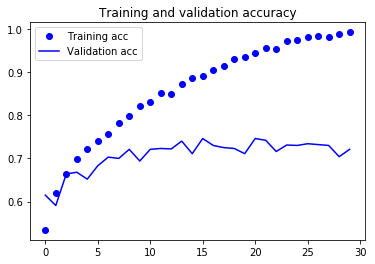

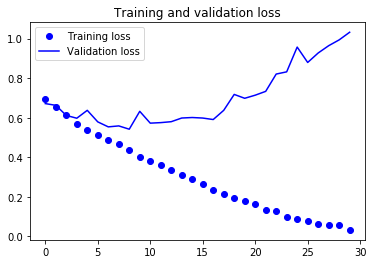

In [69]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련이 끝난 후, 모델의 손실과 정확도 그래프를 나타냈습니다.
overfitting이 나타났음을 알 수 있습니다. train acc는 거의 100%에 달하지만 val acc는 70%에서 멈추었습니다.
train set 크기가 작아서 생길 수 밖에 없는 과적합 문제입니다. 이에 대한 부담을 조금 줄이고자 data agment와 드롭아웃, l2 규제와 같은 기법들을 사용해보겠습니다. 

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

기존의 데이터를 증식해 더 많은 train set을 만들 것입니다. 그럴듯한 이미지를 생성하기 위해 여러 가지 랜덤한 변환을 적용해 셈플을 늘려나갑니다. 
모델이 여러 측면을 학습하게 되는 장점도 있어 일반화에 도움이 될 것입니다. 
rotration_range : 랜덤하게 사진을 회전시킬 각도
width_shift_range와 height은 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위
zoom_range는 랜덤하게 사진을 확대할 범위
horizontal_flip은 랜덤하게 이미지를 반전시킵니다.
fill_mode 는 변환된 이미지에서 새롭게 생성해야할 픽셀을 채울 전략입니다. 

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

데이터 증식을 사용해 네트워크를 훈련시킬 때, 네트워크에 같은 입력 데이터가 두번 들어가지 않습니다. 하지만 적은 수의 원본 이미지에서 만들었기 때문에 여전히 입력 데이터 사이 상호 연관성이 커 과적합을 제거하기 충분치 않을 것입니다.

과적합을 더 억제하기 위해 fully connet 쪽에 drop out을 추가했습니다. 

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [74]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 32s 325ms/step - loss: 0.6917 - acc: 0.5234 - val_loss: 0.6755 - val_acc: 0.5914
Epoch 2/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6760 - acc: 0.5647 - val_loss: 0.7884 - val_acc: 0.5071
Epoch 3/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6667 - acc: 0.5878 - val_loss: 0.6854 - val_acc: 0.5590
Epoch 4/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6515 - acc: 0.6097 - val_loss: 0.6309 - val_acc: 0.6308
Epoch 5/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6296 - acc: 0.6347 - val_loss: 0.6514 - val_acc: 0.6161
Epoch 6/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6153 - acc: 0.6528 - val_loss: 0.6130 - val_acc: 0.6514
Epoch 7/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6042 - acc: 0.6719 - val_loss: 0.5694 - val_acc: 0.6872
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_2.h5')


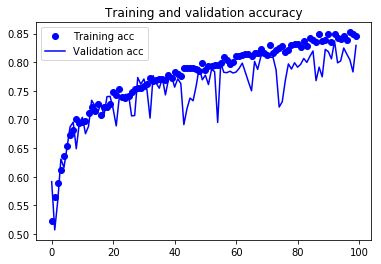

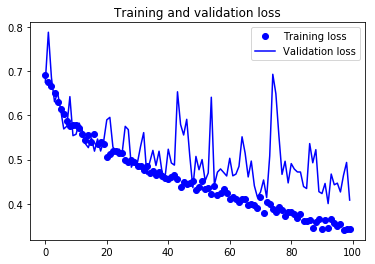

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


val 곡선이 어느정도 train 곡선을 따라가고 있습니다. 충분하지는 않지만 어느정도 과적합이 억제되었음을 볼 수 있습니다. 

검증 데이터에서도 정확도를 약 80%를 달성했습니다. 

In [0]:
MODEL_DIR = '/content/gdrive/My Drive/HW_small/model'
if not os.path.exists(MODEL_DIR) :
  os.mkdir(MODEL_DIR)
  
model_path = "/content/gdrive/My Drive/HW_small/model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
checkpointer = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', verbose = 1, save_best_only=True)

ModelCheckpoint는 선택적으로 지금까지 가장 좋은 모델만 저장할 수 있습니다. 

In [30]:
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
__________

각 Conv2D층에 batch normalization과 L2 norm을 적용했습니다. 마지막 완전 연결층에는 드랍아웃을 추가했습니다. 기존 모델과 다른 점은 bn과 L2를 삽입한 것입니다. 

In [31]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      callbacks = [checkpointer],
      validation_data=validation_generator,
      validation_steps=50)



Epoch 1/100
100/100 [==============================] - 34s 341ms/step - loss: 3.4691 - acc: 0.5925 - val_loss: 3.3243 - val_acc: 0.6523

Epoch 00001: val_loss did not improve from 1.67547
Epoch 2/100
100/100 [==============================] - 31s 305ms/step - loss: 3.3249 - acc: 0.6369 - val_loss: 3.3955 - val_acc: 0.6353

Epoch 00002: val_loss did not improve from 1.67547
Epoch 3/100
100/100 [==============================] - 30s 304ms/step - loss: 3.2536 - acc: 0.6453 - val_loss: 3.2237 - val_acc: 0.6675

Epoch 00003: val_loss did not improve from 1.67547
Epoch 4/100
100/100 [==============================] - 30s 301ms/step - loss: 3.1895 - acc: 0.6619 - val_loss: 3.0629 - val_acc: 0.6946

Epoch 00004: val_loss did not improve from 1.67547
Epoch 5/100
100/100 [==============================] - 30s 302ms/step - loss: 3.1469 - acc: 0.6644 - val_loss: 3.0105 - val_acc: 0.6916

Epoch 00005: val_loss did not improve from 1.67547
Epoch 6/100
100/100 [==============================] - 30s 3

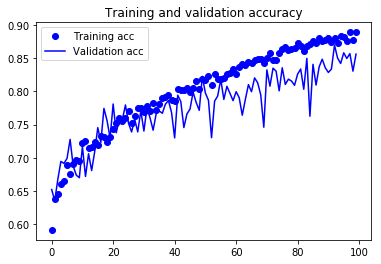

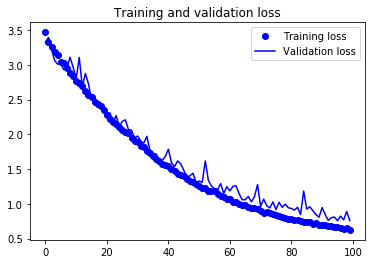

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

bn과 L2 노름을 추가하가 과적합 억제가 더 잘되었습니다. 특히 val_loss는 눈에 띄게 곡선이 안정화 되었음을 확인할 수 있습니다. 

In [40]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/HW_small/model/96-0.7568.hdf5')
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size = (150, 150),
  batch_size = 20,
  class_mode = 'binary')

test_los, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test acc : ', test_acc)

Found 1000 images belonging to 2 classes.
test acc :  0.8289999973773956


check point로 가장 성능이 좋았을 때 가중치들을 저장했었고 그 모델을 불러옵니다.

앞서 준비한 test set으로 모델을 test해봅니다. 그 결과 84%의 정확도를 얻었습니다. 

아직 네트워크 아키텍쳐 설계에 대한 지식이 부족해 책에서 가장 간단하게 구현한 con net을 이용했습니다. 데이터가 지금보다 더 많고 아키텍쳐 또한 널리 알려진 성능 좋은 모델을 도입한다면 결과가 더 잘 나올 것이라 기대됩니다.